### Youtube Trending Videos (category = 10: music) EDA
     
data resource:https://www.kaggle.com/datasnaek/youtube-new?select=CAvideos.csv
        
CA - Canada, 
US - United States 

Goal of the project: identify essential metrics that are relevant to increasing viewers of music channels and build a prediction model. 

Import libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['font.family']= "AppleGothic"

In [2]:
ca_videos = pd.read_csv('./CAvideos.csv')
us_videos = pd.read_csv('./USvideos.csv')

Merge all of datasets 

In [3]:
youtube= pd.concat([us_videos, ca_videos])
youtube.reset_index(inplace=True)
youtube.head(3)

index     video_id trending_date  \
0      0  2kyS6SvSYSE      17.14.11   
1      1  1ZAPwfrtAFY      17.14.11   
2      2  5qpjK5DgCt4      17.14.11   

                                               title    channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE     CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...  LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...     Rudy Mancuso   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...  
1  One year after the presidential election, John...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...

Explore "comment_disabled", "ratings_disabled", and "video_error_or_removed"

In [4]:
youtube.comments_disabled.value_counts()

False    80614
True      1216
Name: comments_disabled, dtype: int64

In [5]:
youtube.ratings_disabled.value_counts()

False    81382
True       448
Name: ratings_disabled, dtype: int64

In [6]:
youtube.video_error_or_removed.value_counts()

False    81780
True        50
Name: video_error_or_removed, dtype: int64

Drop unnecessary columns

In [7]:
youtube = youtube.drop(['index', 'video_id', 'thumbnail_link', 'description'], axis = 1)
youtube.rename(columns = {'title': 'video_title'}, inplace=True)
youtube.head(2)

trending_date                                        video_title  \
0      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1      17.14.11  The Trump Presidency: Last Week Tonight with J...   

     channel_title  category_id              publish_time  \
0     CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1  LastWeekTonight           24  2017-11-13T07:30:00.000Z   

                                                tags    views  likes  \
0                                    SHANtell martin   748374  57527   
1  last week tonight trump presidency|"last week ...  2418783  97185   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   

   video_error_or_removed  
0                   False  
1                   False

Change the category_id numbers to category names

In [8]:
set(youtube.category_id)

{1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 43}

In [9]:
youtube['category_id'].replace({1: "Film & Animation", 2: 'Autos & Vehicles',
                                10: 'Music', 15: 'Pets & Animals', 17: 'Sports',
                               19: 'Travel & Events', 20: 'Gaming', 22: 'People & Blogs',
                               23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics',
                                26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology',
                               29: 'Nonprogits & Activism', 30: 'Movies', 43: 'Shows'}, inplace = True)

In [10]:
youtube.head()

trending_date                                        video_title  \
0      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1      17.14.11  The Trump Presidency: Last Week Tonight with J...   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                   Nickelback Lyrics: Real or Fake?   
4      17.14.11                           I Dare You: GOING BALD!?   

           channel_title     category_id              publish_time  \
0           CaseyNeistat  People & Blogs  2017-11-13T17:13:01.000Z   
1        LastWeekTonight   Entertainment  2017-11-13T07:30:00.000Z   
2           Rudy Mancuso          Comedy  2017-11-12T19:05:24.000Z   
3  Good Mythical Morning   Entertainment  2017-11-13T11:00:04.000Z   
4               nigahiga   Entertainment  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count  comments_disabled  ratings_disabled  \
0      2966          15954              False             False   
1      6146          12703              False             False   
2      5339           8181              False             False   
3       666           2146              False             False   
4      1989          17518              False             False   

   video_error_or_removed  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

In [11]:
youtube.shape

(81830, 13)

Summary of the data

In [12]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81830 entries, 0 to 81829
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           81830 non-null  object
 1   video_title             81830 non-null  object
 2   channel_title           81830 non-null  object
 3   category_id             81830 non-null  object
 4   publish_time            81830 non-null  object
 5   tags                    81830 non-null  object
 6   views                   81830 non-null  int64 
 7   likes                   81830 non-null  int64 
 8   dislikes                81830 non-null  int64 
 9   comment_count           81830 non-null  int64 
 10  comments_disabled       81830 non-null  bool  
 11  ratings_disabled        81830 non-null  bool  
 12  video_error_or_removed  81830 non-null  bool  
dtypes: bool(3), int64(4), object(6)
memory usage: 6.5+ MB


Basic Statistics

In [13]:
youtube.describe()

views         likes      dislikes  comment_count
count  8.183000e+04  8.183000e+04  8.183000e+04   8.183000e+04
mean   1.754415e+06  5.693911e+04  2.861005e+03   6.746303e+03
std    5.785451e+06  1.879156e+05  2.455480e+04   3.060427e+04
min    5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%    1.781945e+05  3.301000e+03  1.360000e+02   5.050000e+02
50%    4.961600e+05  1.283400e+04  4.380000e+02   1.550000e+03
75%    1.355388e+06  4.096175e+04  1.421000e+03   4.626000e+03
max    2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06

Checking for missing data.

In [14]:
youtube.isnull().sum()

trending_date             0
video_title               0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

As I did for the first dataset, I converted tags to the number of tags in a video content.

In [15]:
for i in set(youtube.tags):
    print(type(i))
    print(len(i))
    print(i)

<class 'str'>
106
슈퍼주니어|"SUPER JUNIOR"|"Lo Siento"|"KARD"|"엠카운트다운"|"엠카"|"MCD"|"M COUNTDOWN"|"엠넷"|"Mnet"|"케이팝"|"K POP"|"Kpop"
<class 'str'>
95
kelly ripa|"ugly christmas sweater"|"live with kelly and ryan"|"ryan seacrest"|"jonathan groff"
<class 'str'>
141
kambi|"kambi rajpuria"|"ninja"|"ninja singer"|"latest punjabi songs"|"new punjabi songs 2018"|"punjabi music"|"canada"|"punjab"|"gurdas maan"
<class 'str'>
120
tumblr|"r/tumblr"|"reddit"|"subreddit"|"Top Posts"|"Top Posts of All Time"|"Sorrow TV"|"tumblr posts"|"Dramatic Reading"
<class 'str'>
399
5-Minute Crafts|"DIY"|"Do it yourself"|"crafts"|"trucos"|"trucos de belliza"|"proyectos faciles"|"useful things"|"lifehacks"|"tricks"|"tips"|"DIY projects"|"DIY activities"|"Handcraft"|"Tutorial"|"paper"|"fan"|"colorful"|"bubbles"|"bubble machine"|"bubble making machine"|"hot"|"ice trays"|"ice cubes"|"beach days"|"summer"|"holidays"|"vacation"|"summer break"|"sorbet"|"ice cream"|"air conditioner"
<class 'str'>
28
jason a|"news"|"2017"|"2018"

In [16]:
# code for converting values in tags column.
count = 0
tags = set(youtube.tags)

for i in tags:
    ln = len(i)
    count1 = 0
    for k in range(ln):
        if i[k] == '|':
            count += 1
        elif k+1 == ln:
            count += 1
            youtube['tags'] = youtube['tags'].replace(i, count)
    count = 0

In [17]:
youtube

trending_date                                        video_title  \
0          17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1          17.14.11  The Trump Presidency: Last Week Tonight with J...   
2          17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3          17.14.11                   Nickelback Lyrics: Real or Fake?   
4          17.14.11                           I Dare You: GOING BALD!?   
...             ...                                                ...   
81825      18.14.06                       HOW2: How to Solve a Mystery   
81826      18.14.06                   Eli Lik Lik Episode 13 Partie 01   
81827      18.14.06  KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...   
81828      18.14.06                   Trump Advisor Grovels To Trudeau   
81829      18.14.06                   【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班   

               channel_title      category_id              publish_time  tags  \
0               CaseyNeistat   People & Blogs  2017-11-13T17:13:01.000Z     1   
1            LastWeekTonight    Entertainment  2017-11-13T07:30:00.000Z     4   
2               Rudy Mancuso           Comedy  2017-11-12T19:05:24.000Z    23   
3      Good Mythical Morning    Entertainment  2017-11-13T11:00:04.000Z    27   
4                   nigahiga    Entertainment  2017-11-12T18:01:41.000Z    14   
...                      ...              ...                       ...   ...   
81825        Annoying Orange    Entertainment  2018-06-13T18:00:07.000Z    21   
81826       Elhiwar Ettounsi    Entertainment  2018-06-13T19:01:18.000Z    35   
81827         Kingdom Hearts           Gaming  2018-06-11T17:30:53.000Z    18   
81828        The Young Turks  News & Politics  2018-06-13T04:00:05.000Z    36   
81829               我愛小明星大跟班    Entertainment  2018-06-13T16:00:03.000Z    31   

         views   likes  dislikes  comment_count  comments_disabled  \
0       748374   57527      2966          15954              False   
1      2418783   97185      6146          12703              False   
2      3191434  146033      5339           8181              False   
3       343168   10172       666           2146              False   
4      2095731  132235      1989          17518              False   
...        ...     ...       ...            ...                ...   
81825    80685    1701        99           1312              False   
81826   103339     460        66             51              False   
81827   773347   25900       224           3881              False   
81828   115225    2115       182           1672              False   
81829   107392     300        62            251              False   

       ratings_disabled  video_error_or_removed  
0                 False                   False  
1                 False                   False  
2                 False                   False  
3                 False                   False  
4                 False                   False  
...                 ...                     ...  
81825             False                   False  
81826             False                   False  
81827             False                   False  
81828             False                   False  
81829             False                   False  

[81830 rows x 13 columns]

As I did from the first dataset, I separted publish_date into date and time.

In [18]:
youtube['published_date'] = pd.to_datetime(youtube['publish_time']).dt.date
youtube['published_time_UTC'] = pd.to_datetime(youtube['publish_time']).dt.time

In [19]:
youtube.drop('publish_time', axis =1, inplace=True)

In [20]:
youtube.head()

trending_date                                        video_title  \
0      17.14.11                 WE WANT TO TALK ABOUT OUR MARRIAGE   
1      17.14.11  The Trump Presidency: Last Week Tonight with J...   
2      17.14.11  Racist Superman | Rudy Mancuso, King Bach & Le...   
3      17.14.11                   Nickelback Lyrics: Real or Fake?   
4      17.14.11                           I Dare You: GOING BALD!?   

           channel_title     category_id  tags    views   likes  dislikes  \
0           CaseyNeistat  People & Blogs     1   748374   57527      2966   
1        LastWeekTonight   Entertainment     4  2418783   97185      6146   
2           Rudy Mancuso          Comedy    23  3191434  146033      5339   
3  Good Mythical Morning   Entertainment    27   343168   10172       666   
4               nigahiga   Entertainment    14  2095731  132235      1989   

   comment_count  comments_disabled  ratings_disabled  video_error_or_removed  \
0          15954              False             False                   False   
1          12703              False             False                   False   
2           8181              False             False                   False   
3           2146              False             False                   False   
4          17518              False             False                   False   

  published_date published_time_UTC  
0     2017-11-13           17:13:01  
1     2017-11-13           07:30:00  
2     2017-11-12           19:05:24  
3     2017-11-13           11:00:04  
4     2017-11-12           18:01:41

#### Analysis

A bar chart of 'category_id'

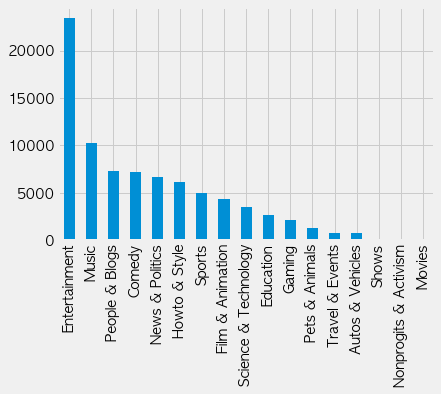

In [21]:
youtube['category_id'].value_counts().plot(kind = 'bar');


Correlation table 

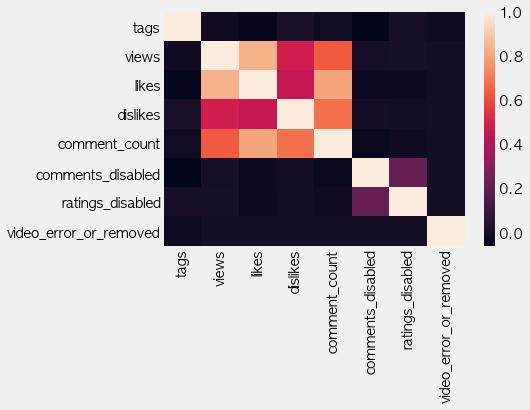

In [22]:
youtube_corr = youtube.corr();
sns.heatmap(youtube_corr);

A scatter plot between 'likes' and 'views'

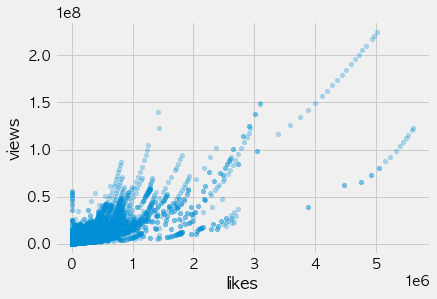

In [23]:
youtube.plot(kind = 'scatter', x = 'likes', y = 'views', alpha = 0.3);

A scatter plot between 'likes' and 'views' with the correlation line 

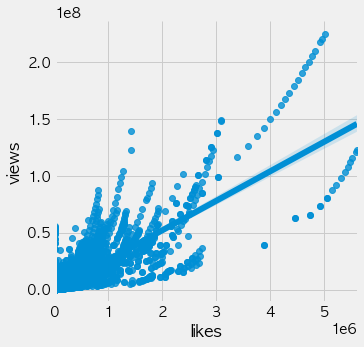

In [24]:
sns.lmplot(x='likes', y = 'views', data=youtube);

Since the project is to obtain useful analysis of music youtube videos, filter the data (only category_id: music)

In [25]:
music = youtube[(youtube.category_id == 'Music')]
music.reset_index(inplace=True)
music = music.drop(['index', 'category_id'], axis = 1)

In [26]:
music

trending_date                                        video_title  \
0          17.14.11         Marshmello - Blocks (Official Music Video)   
1          17.14.11         Eminem - Walk On Water (Audio) ft. Beyoncé   
2          17.14.11  Hunter Hayes - You Should Be Loved (Part One O...   
3          17.14.11  Nickelback - The Betrayal Act III [Official Vi...   
4          17.14.11                                  U2 - The Blackout   
...             ...                                                ...   
10198      18.14.06  Música POP En Inglés 2018 - Música pop para tr...   
10199      18.14.06  Sanju: Kar Har Maidaan Fateh | Ranbir Kapoor |...   
10200      18.14.06                  MAGIC! - Kiss Me (Official Video)   
10201      18.14.06  Difference | Amrit Maan ft Sonia Maan | Latest...   
10202      18.14.06  NCT 미니게임천국 #3: 최강 손가락 컨트롤러 (Professional Finge...   

            channel_title  tags     views   likes  dislikes  comment_count  \
0              marshmello    23    687582  114188      1333           8371   
1              EminemVEVO     6  17158531  787419     43420         125882   
2            Hunter Hayes    13     13917    1318        24             76   
3              Nickelback    14     57169    6927       161            565   
4                  U2VEVO     6     60506    5389       106            455   
...                   ...   ...       ...     ...       ...            ...   
10198      Encanta Música    23   1288940    4818       537            175   
10199            T-Series    24  19472216  309752     10303          21731   
10200  ournameismagicVEVO     4   1073869   63948       356           1672   
10201          Bamb Beats    24  16256855  321798     14006          20453   
10202              SMTOWN    24    261128   32078        91           2021   

       comments_disabled  ratings_disabled  video_error_or_removed  \
0                  False             False                   False   
1                  False             False                   False   
2                  False             False                   False   
3                  False             False                   False   
4                  False             False                   False   
...                  ...               ...                     ...   
10198              False             False                   False   
10199              False             False                   False   
10200              False             False                   False   
10201              False             False                   False   
10202              False             False                   False   

      published_date published_time_UTC  
0         2017-11-13           17:00:00  
1         2017-11-10           17:00:03  
2         2017-11-13           15:01:18  
3         2017-11-13           15:31:44  
4         2017-11-13           17:00:04  
...              ...                ...  
10198     2018-06-11           14:51:50  
10199     2018-06-10           05:31:55  
10200     2018-06-08           21:47:31  
10201     2018-06-08           11:13:27  
10202     2018-06-13           10:00:04  

[10203 rows x 13 columns]

Convert trending_date string into datetime.

In [27]:
from datetime import datetime

In [28]:
music['trending_date'] = pd.to_datetime(music['trending_date'], format = '%y.%d.%m')
music.head()

trending_date                                        video_title  \
0    2017-11-14         Marshmello - Blocks (Official Music Video)   
1    2017-11-14         Eminem - Walk On Water (Audio) ft. Beyoncé   
2    2017-11-14  Hunter Hayes - You Should Be Loved (Part One O...   
3    2017-11-14  Nickelback - The Betrayal Act III [Official Vi...   
4    2017-11-14                                  U2 - The Blackout   

  channel_title  tags     views   likes  dislikes  comment_count  \
0    marshmello    23    687582  114188      1333           8371   
1    EminemVEVO     6  17158531  787419     43420         125882   
2  Hunter Hayes    13     13917    1318        24             76   
3    Nickelback    14     57169    6927       161            565   
4        U2VEVO     6     60506    5389       106            455   

   comments_disabled  ratings_disabled  video_error_or_removed published_date  \
0              False             False                   False     2017-11-13   
1              False             False                   False     2017-11-10   
2              False             False                   False     2017-11-13   
3              False             False                   False     2017-11-13   
4              False             False                   False     2017-11-13   

  published_time_UTC  
0           17:00:00  
1           17:00:03  
2           15:01:18  
3           15:31:44  
4           17:00:04

A brief info for sorted dataset.

In [29]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10203 entries, 0 to 10202
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           10203 non-null  datetime64[ns]
 1   video_title             10203 non-null  object        
 2   channel_title           10203 non-null  object        
 3   tags                    10203 non-null  int64         
 4   views                   10203 non-null  int64         
 5   likes                   10203 non-null  int64         
 6   dislikes                10203 non-null  int64         
 7   comment_count           10203 non-null  int64         
 8   comments_disabled       10203 non-null  bool          
 9   ratings_disabled        10203 non-null  bool          
 10  video_error_or_removed  10203 non-null  bool          
 11  published_date          10203 non-null  object        
 12  published_time_UTC      10203 non-null  object

#### Graphs for each column value by trending date.

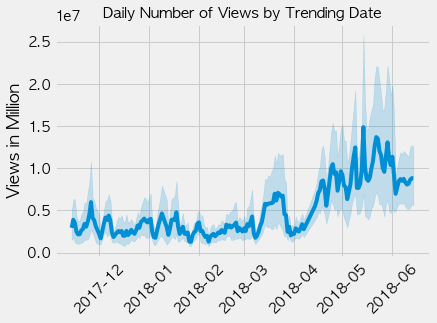

In [34]:
views = music.set_index("trending_date")['views']
sns.lineplot(data=views)
plt.title("Daily Number of Views by Trending Date", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Views in Million")
plt.xlabel("");

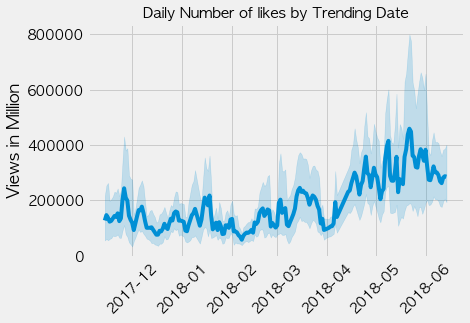

In [41]:
views = music.set_index("trending_date")['likes']
sns.lineplot(data=views)
plt.title("Daily Number of likes by Trending Date", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Views in Million")
plt.xlabel("");

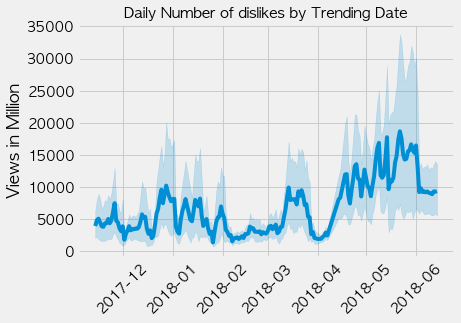

In [42]:
views = music.set_index("trending_date")['dislikes']
sns.lineplot(data=views)
plt.title("Daily Number of dislikes by Trending Date", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Views in Million")
plt.xlabel("");

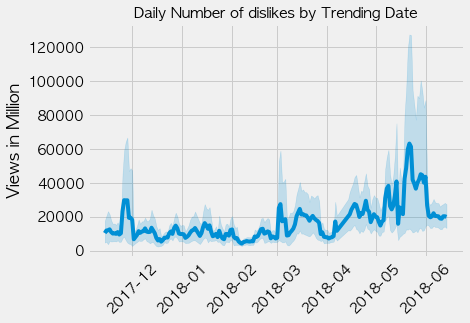

In [43]:
views = music.set_index("trending_date")['comment_count']
sns.lineplot(data=views)
plt.title("Daily Number of dislikes by Trending Date", fontsize = 15)
plt.xticks(rotation=45)
plt.ylabel("Views in Million")
plt.xlabel("");